In [5]:
# Importing necessary libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart-disease.csv")

print("Shape:", df.shape)
df.head()

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Structure and Data Summary
df.info()
df.describe(include = "all").transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
# Checking for and dealing with missing and duplicate values
print("Missing values per column:\n", df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop = True)

print("Shape after cleaning:", df.shape)

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate rows: 1
Shape after cleaning: (302, 14)


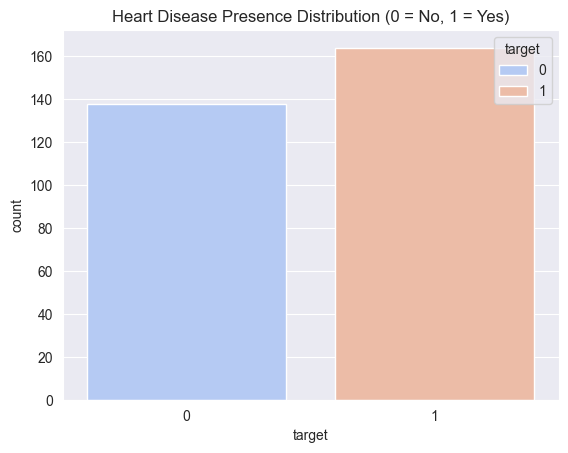

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64


In [10]:
# Target variable distribution
sns.countplot(x = "target", data = df, palette = "coolwarm", hue = "target")
plt.title("Heart Disease Presence Distribution (0 = No, 1 = Yes)")
plt.show()

print(df["target"].value_counts(normalize = True))

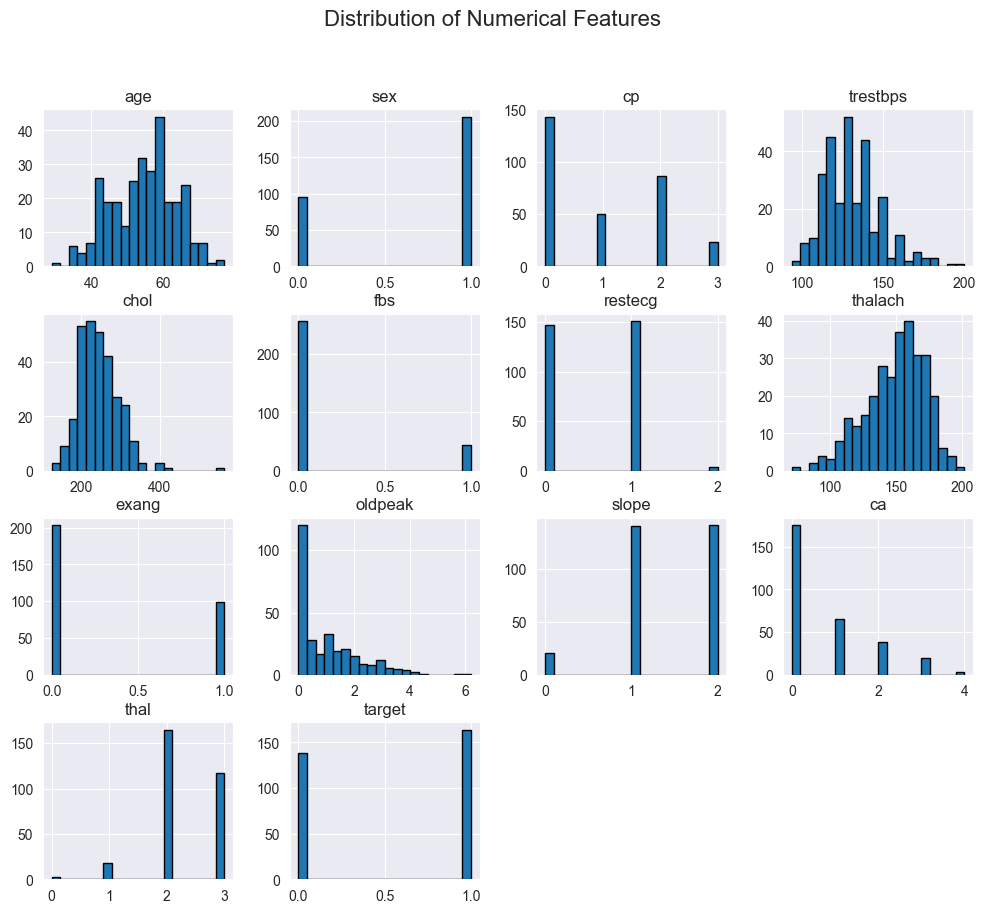

In [13]:
# Univariate analysis
df.hist(figsize = (12, 10), bins = 20, edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize = 16)
plt.show()

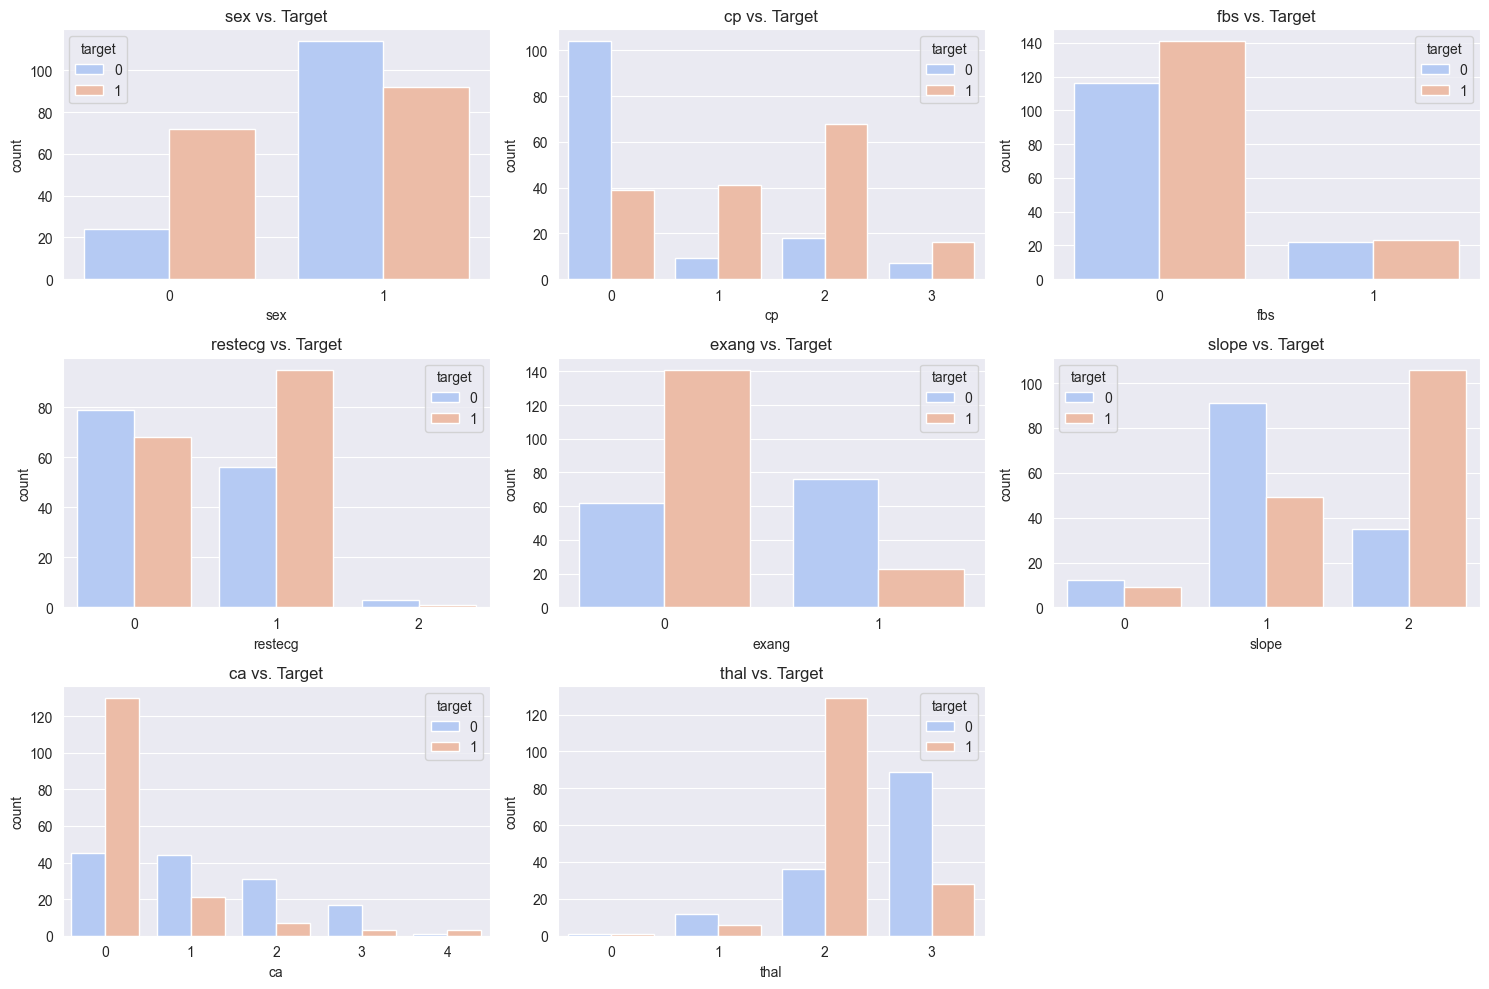

In [14]:
# Plotting categorical variables against target
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

plt.figure(figsize = (15, 10))
for i, col in enumerate(categorical_cols[:8]):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x = col, hue = "target", data = df, palette = "coolwarm")
    plt.title(f"{col} vs. Target")
    plt.tight_layout()
plt.show()

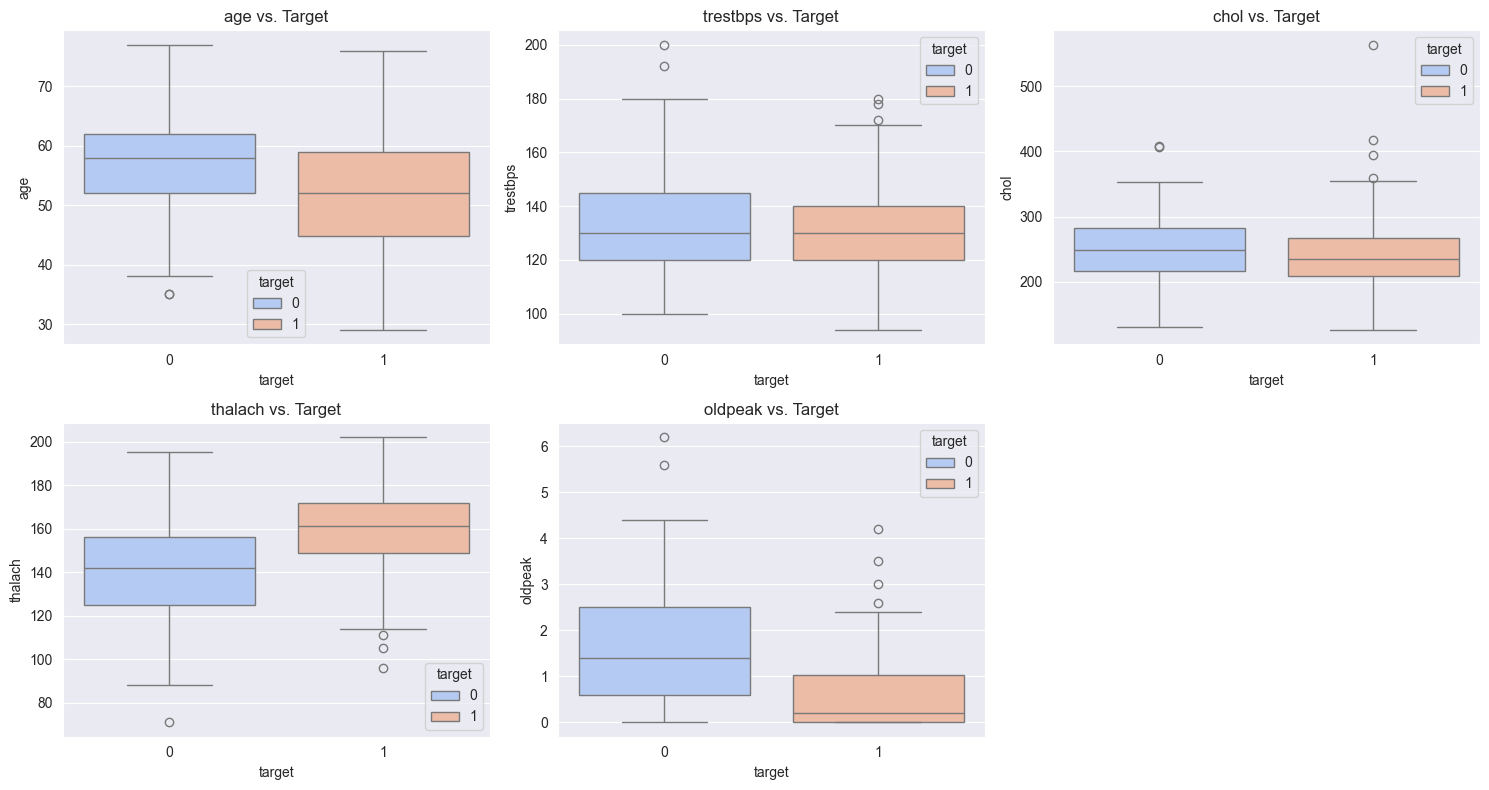

In [16]:
# Plotting numerical variables against variables
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

plt.figure(figsize = (15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x = "target", y = col, data = df, palette = "coolwarm", hue = "target")
    plt.title(f"{col} vs. Target")
plt.tight_layout()
plt.show()